# Analiza danych – ćwiczenia 1.
### Przygotowanie środowiska Python


##### Autor: mgr inż. Bartosz Czech

---

###### 1. Upewnij się, że korzystasz z Pythona w wersji 3.7:

In [ ]:

from platform import python_version
print(python_version())

###### 2. Zaimportuj potrzebne biblioteki:

In [3]:
import tensorflow as tf
print("Moja wersja TensorFlow: " + tf.__version__)

# W przypadku wystąpienia błędów, zaktualizuj bibliotekę NumPy

Moja wersja TensorFlow: 1.14.0


In [4]:
import keras
print("Moja wersja Keras: " + keras.__version__)

Moja wersja Keras: 2.3.1


Using TensorFlow backend.


In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import pandas as pd

###### 3. Zaimportuj dane:

In [6]:
data = pd.read_csv("../data/logreg.txt", sep = ";")

In [7]:
data.head() # zwraca 5 pierwszych wierszy z pliku

,genotype,QUAL,DP,DP2,GQ,CALL,BEFORE1,BEFORE2,BEFORE3,BEHIND1,BEHIND2,BEHIND3
0,1,87093,74,50.0,63.0,3,C,C,A,A,A,A
1,1,56419,64,9.0,100.0,3,A,G,G,A,C,A
2,1,40180,68,48.0,NaN,2,A,G,G,T,A,A
3,1,33677,57,48.0,3.0,3,C,A,C,G,G,G
4,1,78396,51,50.0,21.0,5,A,A,T,A,A,A


In [8]:
data.shape # odpowiednik funkcji dim() w R

(2294151, 12)

In [9]:
print(data.dtypes) # wyświetla typ każdej z kolumn

genotype      int64
QUAL          int64
DP            int64
DP2         float64
GQ          float64
CALL          int64
BEFORE1      object
BEFORE2      object
BEFORE3      object
BEHIND1      object
BEHIND2      object
BEHIND3      object
dtype: object


In [10]:
data=data.astype({'genotype':'object'})

In [11]:
print(data.dtypes) # wyświetla typ każdej z kolumn

genotype     object
QUAL          int64
DP            int64
DP2         float64
GQ          float64
CALL          int64
BEFORE1      object
BEFORE2      object
BEFORE3      object
BEHIND1      object
BEHIND2      object
BEHIND3      object
dtype: object


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x140157f28>,
      dtype=object)

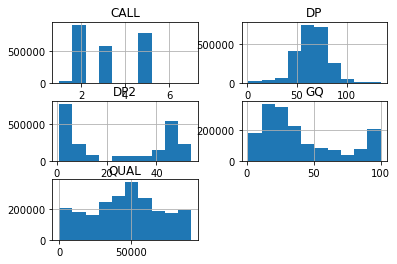

In [12]:
data.hist()

In [13]:
data.sample(10) # zwraca 10 losowych wierszy z pliku

,genotype,QUAL,DP,DP2,GQ,CALL,BEFORE1,BEFORE2,BEFORE3,BEHIND1,BEHIND2,BEHIND3
1330135,1,30842,62,6.0,38.0,2,A,G,A,T,G,T
1940915,1,46082,59,32.0,11.0,3,G,G,G,A,T,C
1846230,1,21887,65,52.0,100.0,3,C,C,T,A,G,G
832944,1,12206,79,3.0,28.0,5,G,G,C,C,T,A
251403,1,14481,53,39.0,43.0,3,A,T,G,C,T,A
948911,1,58079,64,45.0,79.0,3,T,T,T,T,A,C
18960,1,68016,65,50.0,21.0,5,G,C,C,A,A,A
1677898,1,10594,77,3.0,25.0,5,T,A,C,A,C,A
2064397,1,30574,85,8.0,41.0,2,A,C,G,A,G,A
1324474,1,81519,61,45.0,18.0,2,T,A,G,A,A,A


In [14]:
data.BEFORE1.value_counts() # zlicza liczbę unikalnych wartości dla pola BEFORE1 

A    675363
T    646812
C    502635
G    469341
Name: BEFORE1, dtype: int64

In [15]:
data.describe() # odpowiednik summary() w R; statystyki opisowe dla kolumn typu numerycznego

,QUAL,DP,DP2,GQ,CALL
count,2.294151e+06,2.294151e+06,2.270416e+06,1.729625e+06,2.294151e+06
mean,4.618698e+04,6.580229e+01,2.458300e+01,3.951257e+01,3.270535e+00
std,2.434921e+04,1.663050e+01,1.972824e+01,3.018805e+01,1.316337e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.866200e+04,5.600000e+01,4.000000e+00,1.800000e+01,2.000000e+00
50%,4.746200e+04,6.500000e+01,2.300000e+01,2.800000e+01,3.000000e+00
75%,6.359900e+04,7.500000e+01,4.600000e+01,5.700000e+01,5.000000e+00
max,9.177700e+04,1.340000e+02,5.400000e+01,1.000000e+02,7.000000e+00


In [16]:
data.isnull()

,genotype,QUAL,DP,DP2,GQ,CALL,BEFORE1,BEFORE2,BEFORE3,BEHIND1,BEHIND2,BEHIND3
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2294146,False,False,False,False,True,False,False,False,False,False,False,False
2294147,False,False,False,False,True,False,False,False,False,False,False,False
2294148,False,False,False,False,True,False,False,False,False,False,False,False
2294149,False,False,False,False,True,False,False,False,False,False,False,False


---

**1.** Stwórz ramkę danych zawierającą output metody describe() wraz z liczbą brakujących danych dla każdej kolumny.

*Rozwiązanie*:

In [17]:
# argument all umożliwia zast. metody dla każdej kolumny
des = data.describe(include='all') 
# kolejno: zlicz NA, zsumuj, zamień na dataframe, transponuj 
desNa = data.isnull().sum().to_frame(name='NA').T 
# concat odpowiednik rbind() w R
pd.concat([des, desNa])

,genotype,QUAL,DP,DP2,GQ,CALL,BEFORE1,BEFORE2,BEFORE3,BEHIND1,BEHIND2,BEHIND3
count,2294151.0,2.294151e+06,2.294151e+06,2.270416e+06,1.729625e+06,2.294151e+06,2294151,2294151,2294151,2294151,2294151,2294151
unique,2.0,NaN,NaN,NaN,NaN,NaN,4,5,5,4,4,4
top,1.0,NaN,NaN,NaN,NaN,NaN,A,A,A,T,T,T
freq,2219387.0,NaN,NaN,NaN,NaN,NaN,675363,654180,697158,700221,654156,674547
mean,NaN,4.618698e+04,6.580229e+01,2.458300e+01,3.951257e+01,3.270535e+00,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.434921e+04,1.663050e+01,1.972824e+01,3.018805e+01,1.316337e+00,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.866200e+04,5.600000e+01,4.000000e+00,1.800000e+01,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,4.746200e+04,6.500000e+01,2.300000e+01,2.800000e+01,3.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,6.359900e+04,7.500000e+01,4.600000e+01,5.700000e+01,5.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


**2.** Sprawdź poprawność kolumn BEFORE\* oraz BEHIND\*, tzn. upewnij się, że kolumy zawierają tylko oznaczenia nukleotydów oraz czy formatowanie jest jednolite.

*Rozwiązanie:*

In [18]:
# kolejno: wybierz kolumny typu 'object', wyswietl wszystkie kolumny indeksowane od 1 do końca,
# zastosuj funkcję value_counts dla każdej kolumny (funkcja apply)
data.select_dtypes('object').iloc[:,1:].apply(pd.value_counts)

,BEFORE1,BEFORE2,BEFORE3,BEHIND1,BEHIND2,BEHIND3
A,675363.0,654180,697158,567627.0,623460.0,645987.0
C,502635.0,555156,628881,400824.0,463272.0,469758.0
G,469341.0,463566,399474,625479.0,553263.0,503859.0
N,NaN,3,3,NaN,NaN,NaN
T,646812.0,621246,568635,700221.0,654156.0,674547.0
